# ANN - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


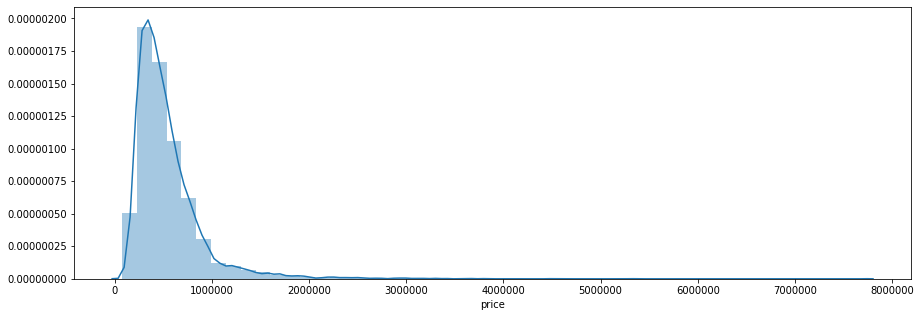

In [3]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

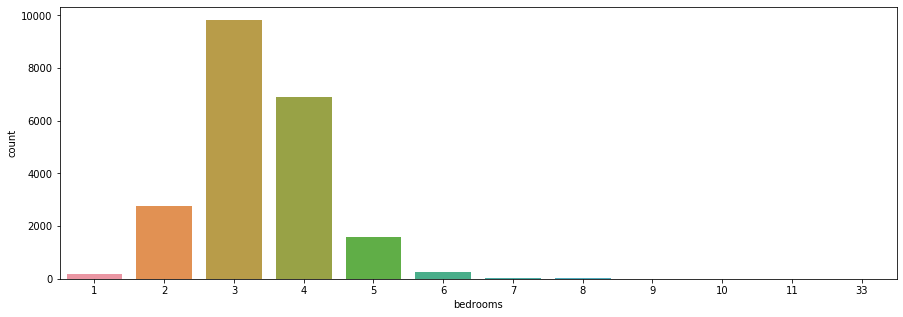

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(df['bedrooms'])

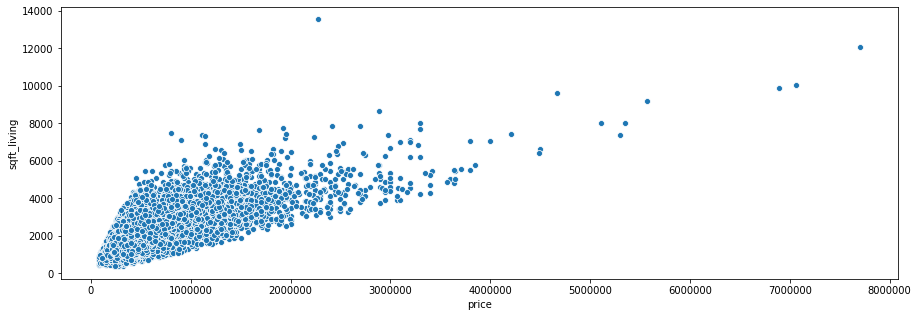

In [5]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

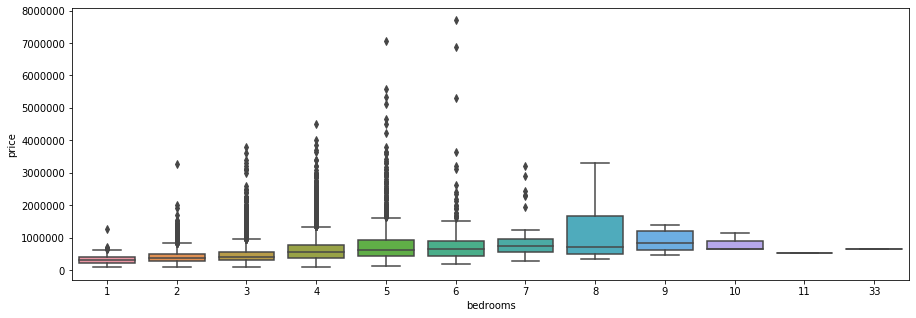

In [6]:
plt.figure(figsize=(15,5))
sns.boxplot(x='bedrooms',y='price',data=df)

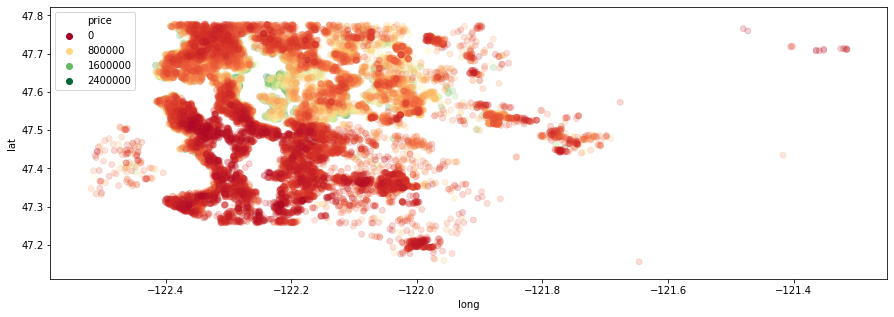

In [7]:
# filter out extreme priced houses
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(15,5))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

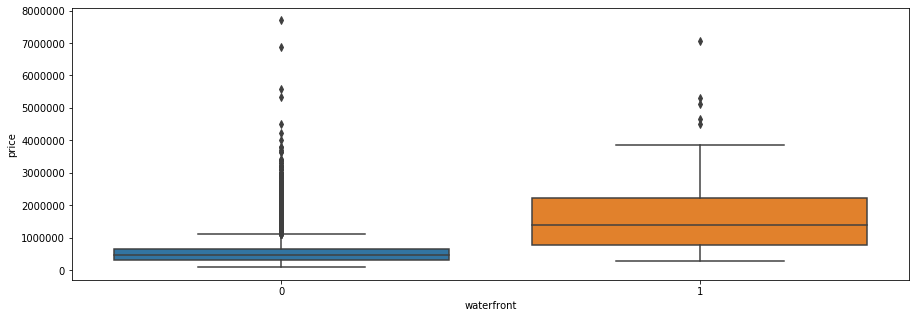

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(x='waterfront',y='price',data=df)

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.drop(columns=['id', 'zipcode', 'date'], inplace=True)

In [10]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train.values, validation_data=(X_test,y_test.values), batch_size=128,epochs=200)

Epoch 1/200
119/119 [==============================] - 0s 4ms/step - loss: 430245642240.0000 - val_loss: 418944319488.0000
Epoch 2/200
119/119 [==============================] - 0s 3ms/step - loss: 429336199168.0000 - val_loss: 415548932096.0000
Epoch 3/200
119/119 [==============================] - 0s 3ms/step - loss: 414196301824.0000 - val_loss: 379744124928.0000
Epoch 4/200
119/119 [==============================] - 0s 3ms/step - loss: 336059498496.0000 - val_loss: 252940140544.0000
Epoch 5/200
119/119 [==============================] - 0s 3ms/step - loss: 180803223552.0000 - val_loss: 112135708672.0000
Epoch 6/200
119/119 [==============================] - 0s 3ms/step - loss: 102396567552.0000 - val_loss: 94777942016.0000
Epoch 7/200
119/119 [==============================] - 0s 3ms/step - loss: 97143988224.0000 - val_loss: 93267787776.0000
Epoch 8/200
119/119 [==============================] - 0s 3ms/step - loss: 95470231552.0000 - val_loss: 91619565568.0000
Epoch 9/200
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 38119194624.0000 - val_loss: 36860067840.0000
Epoch 69/200
119/119 [==============================] - 0s 2ms/step - loss: 37920092160.0000 - val_loss: 36655329280.0000
Epoch 70/200
119/119 [==============================] - 0s 2ms/step - loss: 37733527552.0000 - val_loss: 36463013888.0000
Epoch 71/200
119/119 [==============================] - 0s 2ms/step - loss: 37562437632.0000 - val_loss: 36307755008.0000
Epoch 72/200
119/119 [==============================] - 0s 2ms/step - loss: 37431951360.0000 - val_loss: 36058963968.0000
Epoch 73/200
119/119 [==============================] - 0s 2ms/step - loss: 37146939392.0000 - val_loss: 35918471168.0000
Epoch 74/200
119/119 [==============================] - 0s 2ms/step - loss: 36996505600.0000 - val_loss: 35674341376.0000
Epoch 75/200
119/119 [==============================] - 0s 2ms/step - loss: 36811333632.0000 - val_loss: 35483369472.0000
Epoch 76/200
119/119 [===============

Epoch 135/200
119/119 [==============================] - 0s 2ms/step - loss: 32810084352.0000 - val_loss: 31304640512.0000
Epoch 136/200
119/119 [==============================] - 0s 2ms/step - loss: 32782116864.0000 - val_loss: 31283537920.0000
Epoch 137/200
119/119 [==============================] - 0s 2ms/step - loss: 32776878080.0000 - val_loss: 31271426048.0000
Epoch 138/200
119/119 [==============================] - 0s 2ms/step - loss: 32767494144.0000 - val_loss: 31233099776.0000
Epoch 139/200
119/119 [==============================] - 0s 3ms/step - loss: 32718997504.0000 - val_loss: 31210520576.0000
Epoch 140/200
119/119 [==============================] - 0s 3ms/step - loss: 32671612928.0000 - val_loss: 31140995072.0000
Epoch 141/200
119/119 [==============================] - 1s 5ms/step - loss: 32640536576.0000 - val_loss: 31140980736.0000
Epoch 142/200
119/119 [==============================] - 0s 4ms/step - loss: 32619048960.0000 - val_loss: 31064172544.0000
Epoch 143/200
11

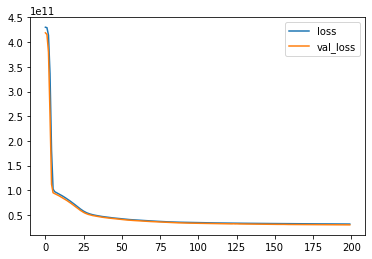

In [12]:
pd.DataFrame(model.history.history).plot()

In [13]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)
np.sqrt(mean_squared_error(y_test,predictions))
explained_variance_score(y_test,predictions)

0.7762859780955007

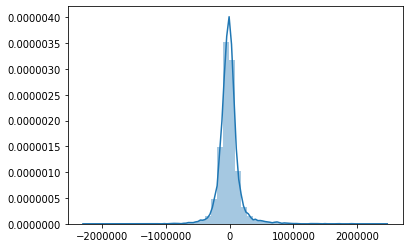

In [14]:
errors = y_test.values.reshape(6480, 1) - predictions
sns.distplot(errors)

# ANN - Classification

In [ ]:
df = pd.read_csv('./data/cancer_classification.csv')
df.head()

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='benign_0__mal_1',data=df)

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr())

In [ ]:
plt.figure(figsize=(12,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

In [ ]:
# overfit
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# add early stopping, dropout later
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=200, 
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

# ANN - Classificaiton - 2

In [2]:
df = pd.read_csv('./data/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


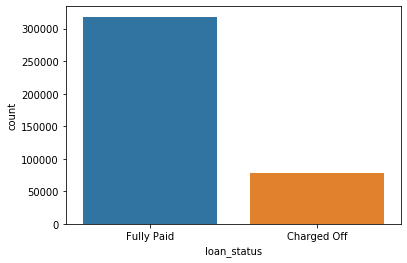

In [3]:
sns.countplot(x='loan_status',data=df)

(0, 45000)

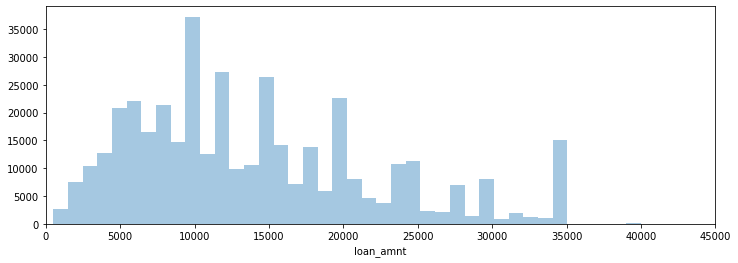

In [4]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

(10, 0)

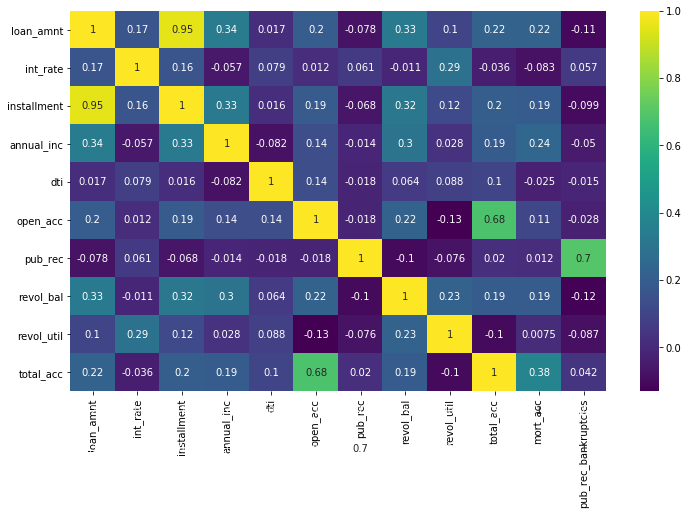

In [5]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

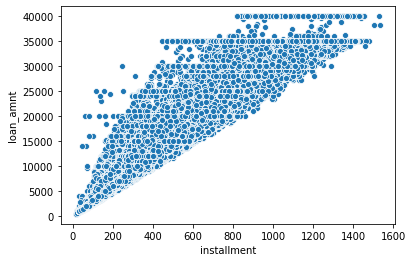

In [6]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

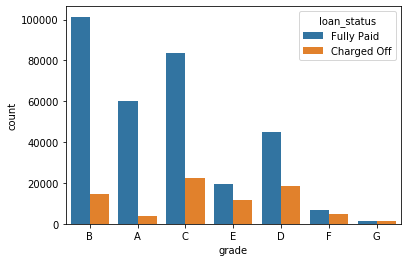

In [7]:
sns.countplot(x='grade',data=df,hue='loan_status')

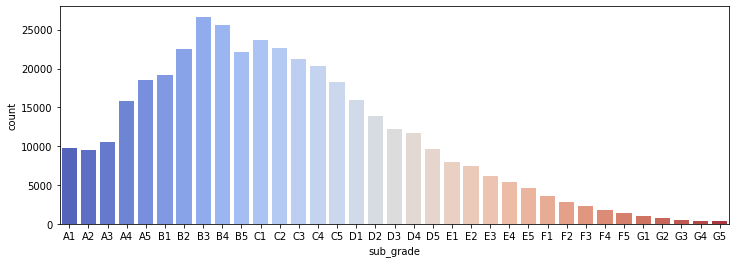

In [8]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm')

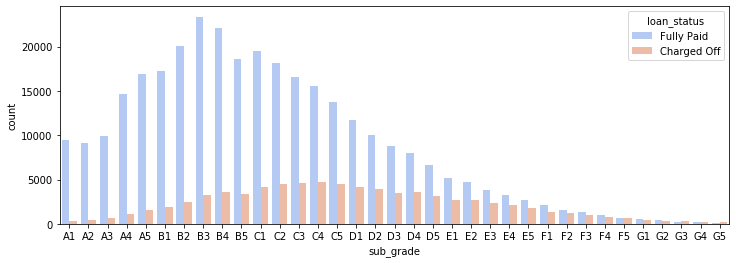

In [9]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

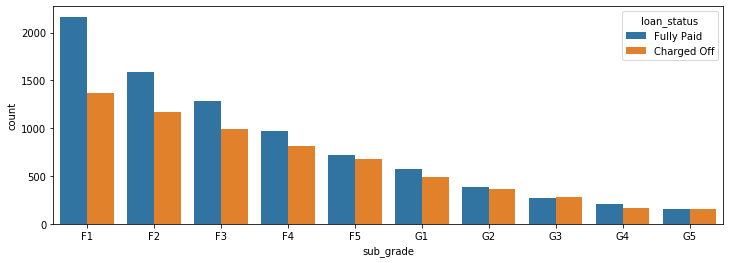

In [10]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [11]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

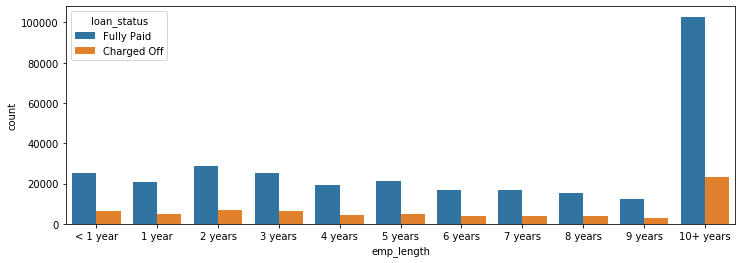

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')

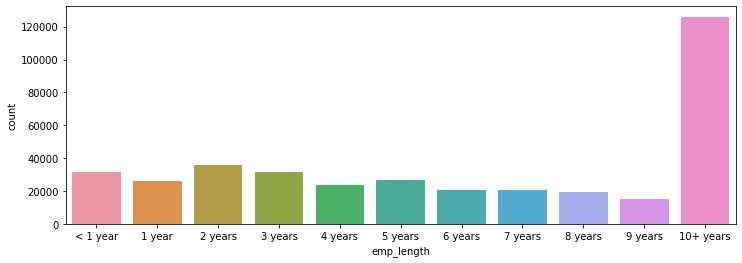

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df, order=emp_length_order)

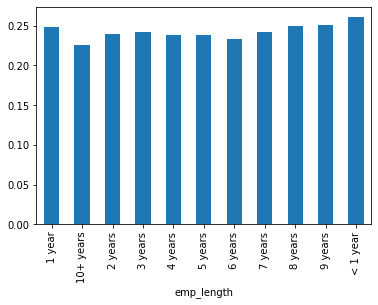

In [14]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len.plot(kind='bar')
emp_len.plot(kind='bar')

In [15]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [16]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [17]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
loan_repaid                  2
dtype: int64

In [18]:
df.drop(columns=['emp_title', 'emp_length', 'title', 'grade'], inplace=True)

In [19]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [20]:
# fill mort_acc na values with total_acc
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
fill_mort_acc = df.loc[df['mort_acc'].isnull()].apply(lambda x: total_acc_avg[x['total_acc']], axis=1)
df.loc[df['mort_acc'].isnull(), 'mort_acc'] = fill_mort_acc

In [21]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose', 'sub_grade']],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose', 'sub_grade'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [24]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3'

In [25]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [26]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [27]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [28]:
df = df.drop('issue_d',axis=1)

In [29]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)
df = df.drop('loan_status',axis=1)

In [30]:
df['term'].value_counts()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [32]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 316175 samples, validate on 79044 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2982 - val_loss: 0.2648
Epoch 2/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2649 - val_loss: 0.2628
Epoch 3/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2629 - val_loss: 0.2625
Epoch 4/25
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2615 - val_loss: 0.2623
Epoch 5/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2609 - val_loss: 0.2617
Epoch 6/25
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2604 - val_loss: 0.2619
Epoch 7/25
316175/316175 [==============================] - 

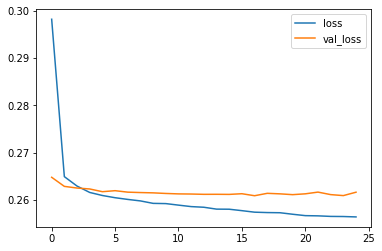

In [34]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [35]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

